# Deep Learning: Perceptrons

In [1]:
student_name = 'Juha-Matti Hellsten'

## Topic: Happiness, Classifier: Perceptron

Check out the **Somerville Happiness Survey Data Set** at
[https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey).

Preprocess the data.

In [2]:
import pandas as pd

df = pd.read_csv('data/SomervilleHappinessSurvey2015.csv', encoding='utf-16')

feature_columns = [
     'info-availability',
     'cost-of-housing',
     'quality-public-schools',
     'trust-in-local-police',
     'maintenance-of-streets',
     'social-event-availability'
]

columns = ['happy'] + feature_columns

df.columns = columns

print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['happy', 'info-availability', 'cost-of-housing',
       'quality-public-schools', 'trust-in-local-police',
       'maintenance-of-streets', 'social-event-availability'],
      dtype='object')
First row by position: happy                        0
info-availability            3
cost-of-housing              3
quality-public-schools       3
trust-in-local-police        4
maintenance-of-streets       2
social-event-availability    4
Name: 0, dtype: int64


### Split the dataset into training (67 %) and testing (33 %) (`X_train`, `y_train`, `X_test`, `y_test`) dataset.
### Use random seed `9001`.

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='happy')
y = df['happy']        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)

In [4]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


## Implement a linear perceptron classifier

1. Use the linear perceptron from `scikit-learn` library to create a classifier. Save the classifier in the `pc` variable.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`. Hint: you can use `decision_function()` to calculate confidence scores.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

4. Calculate the ROC values for the regression using the `metrics` module of the `scikit-learn` library.
   Calculate the area under the ROC curve variable `auc`. Plot the threshold optimization curve using the `matplotlib` library.

5. Write in the `reflection` variable thoughts of ROC curve and accuracy.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

pc = Perceptron(random_state=9001)
pc.fit(X_train_scaled, y_train)

Perceptron(random_state=9001)

In [6]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.
print(f'Perceptron average test accuracy: {pc.score(X_test, y_test)}')

Perceptron average test accuracy: 0.5


In [7]:
from sklearn import metrics

y_pred = pc.predict(X_test_scaled)
y_score = pc.decision_function(X_test_scaled)

cr = metrics.classification_report(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

# TODO: Reflection - thoughts of ROC curve and accuracy.

reflection = """The perceptron classifier's accuracy is 0.5, which means that it 
does not perform better than random guessing. This suggests that either the 
data is too complex for a simple linear perceptron to classify effectively. 
AUC is 0.60 whis is decent, but not great."""

Classification report:
               precision    recall  f1-score   support

           0       0.55      0.25      0.34        24
           1       0.51      0.79      0.62        24

    accuracy                           0.52        48
   macro avg       0.53      0.52      0.48        48
weighted avg       0.53      0.52      0.48        48

Confusion matrix:
 [[ 6 18]
 [ 5 19]]
auc: 0.6024305555555556
Reflection: The perceptron classifier's accuracy is 0.5, which means that it 
does not perform better than random guessing. This suggests that either the 
data is too complex for a simple linear perceptron to classify effectively. 
AUC is 0.60 whis is decent, but not great.


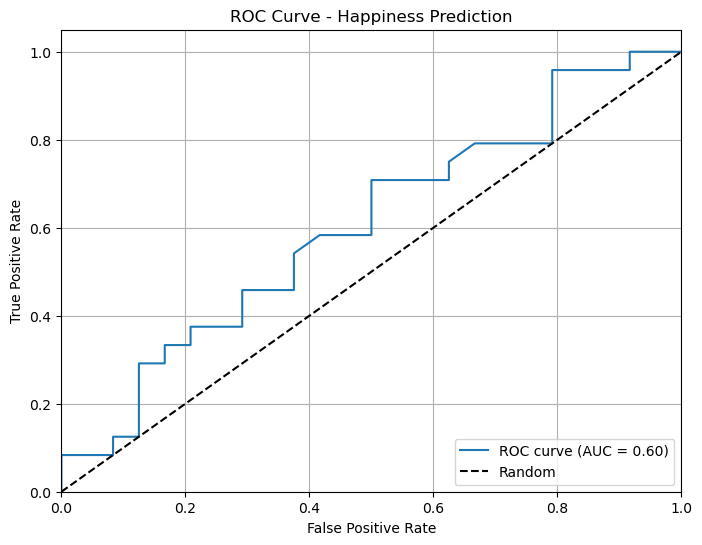

In [8]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {auc}')
print(f'Reflection: {reflection}')

# TODO: Visualize results also
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Happiness Prediction')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Topic: Newsgroup messages with Perceptron

Check out the following dataset:

* `sklearn.datasets.fetch_20newsgroups`

This data contains messages sent to 20 newsgroups. Data does not need to be pre-processed at all.
The following categories are used in the classification:
* `categories: ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']`
* `categories_2: ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']`

The dataset is already divided into test and train sets (`fetch_20newsgroups(subset)`).
Use the following variables with training and test sets (`X_train`, `y_train`, `X_test`, `y_test`).

Transform both training and test data with the methods of the `TfidfVectorizer` class.
* Scaling is not needed here after this
* You should print samples of the values to see if values are on the right scale: **0-1**.


In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Vectorizer = TfidfVectorizer()

# TODO: Transform the training data to numerical with the fit_transform() method
X_train = Vectorizer.fit_transform(ng_train.data)

# TODO: Transform the test data using a different method
X_test = Vectorizer.transform(ng_test.data)

y_train = ng_train.target
y_test = ng_test.target

1. Use the linear perceptron from `scikit-learn` library to create a classifier.
   Save the classifier in the `pc` variable. Use random seed `12501`.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

In [10]:
pc = Perceptron(random_state=12501)
pc.fit(X_train, y_train)

y_pred = pc.predict(X_test)
y_score = pc.decision_function(X_test)

cr = metrics.classification_report(y_test, y_pred)  # Käytetään y_testia
cm = metrics.confusion_matrix(y_test, y_pred)

print(f'Classification report:\n{cr}')

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



In [11]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f"Predict: {y_pred} and score: {y_score}")

print(f'Perceptron average test accuracy: {pc.score(X_test, ng_test.target)}')

print(cm) # compare the actual values with the predictions

print(cr)

Predict: [1 2 0 ... 0 2 0] and score: [[-0.21437599  0.43421675 -0.35453969]
 [-0.3811092  -0.11365841 -0.01741706]
 [ 0.13018903 -0.89340003 -0.43527784]
 ...
 [ 0.01711722 -0.07380962 -0.23293169]
 [-0.77755308 -0.6939603   0.59417642]
 [ 0.21410956 -0.09395535 -0.1688701 ]]
Perceptron average test accuracy: 0.8582214765100671
[[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



### A picture of the confusion matrix.

<Figure size 800x800 with 0 Axes>

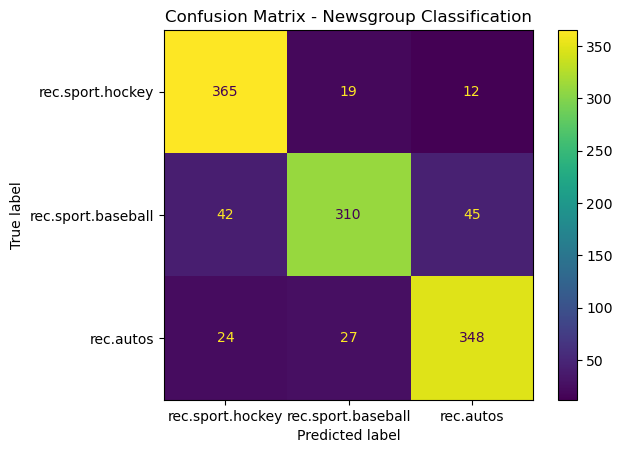

In [12]:
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot()
plt.title('Confusion Matrix - Newsgroup Classification')
plt.show()

## Another newgroup classifier

Do the exactly same task as in _assignment 1-2_ by using another `categories_2` categories list.
* The obtained results are analyzed by comparing results with the results of _assignment 1-2_.

Reflection: Compare the learning results with the newsgroup data with each other.
Verbally reflect on what the possible differences in the results are due to.

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

ng_train = fetch_20newsgroups(subset='train', categories=categories_2, remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories_2, remove=('headers', 'footers', 'quotes'))

Vectorizer = TfidfVectorizer()

X_train = Vectorizer.fit_transform(ng_train.data)
X_test = Vectorizer.transform(ng_test.data)

# TODO: Transform the training data with the fit_transform() method
# TODO: Transform the test data

clf = Perceptron(random_state=12501)
clf.fit(X_train, ng_train.target)

y_pred = clf.predict(X_test)
y_score = clf.decision_function(X_test)

cm = confusion_matrix(ng_test.target, y_pred)
cr = classification_report(ng_test.target, y_pred)

In [14]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {clf.score(X_test, ng_test.target)}')
print(confusion_matrix(ng_test.target, y_pred))
print(classification_report(ng_test.target, y_pred))

Predict: [0 2 1 ... 0 1 1] and score: [[ 0.79084953 -0.54862678 -0.67818069]
 [-0.24036164 -0.5191811   0.02529202]
 [-0.27250296  0.18487685 -0.02065824]
 ...
 [ 0.38867009 -0.19169666 -0.59294443]
 [-0.68236023  0.88524358 -0.85308886]
 [-0.33076315  0.23788087 -0.61880495]]
Perceptron average test accuracy: 0.732597623089983
[[297  47  45]
 [ 73 292  29]
 [ 68  53 274]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       389
           1       0.74      0.74      0.74       394
           2       0.79      0.69      0.74       395

    accuracy                           0.73      1178
   macro avg       0.74      0.73      0.73      1178
weighted avg       0.74      0.73      0.73      1178



### A picture of the confusion matrix with `categories_2` data.

<Figure size 800x800 with 0 Axes>

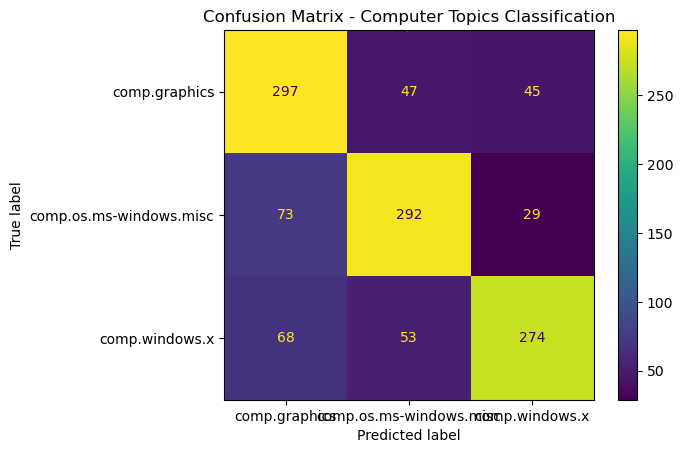

In [15]:
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories_2)
disp.plot()
plt.title('Confusion Matrix - Computer Topics Classification')
plt.show()

In [16]:
Reflection = """In comparison to categories used in the first assignment, 
                in this result there is a smaller accuracy (0.73 vs. 0.86).
                This may be because of the categories being more complex and
                more difficult to classify. The content of the categories may
                affect the results. For instance, technical subjects may be more
                complex than subjects in sports, which affects the performance of 
                the model."""